# COM S 474/574 Spring 2024
# 4.1 Linear Regression
## Gabriel Ferreira(gabferre@iastate.edu)

### - The Real Estate Dataset

- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

In [1]:
import numpy as np 
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

### Dataset

In [2]:
x=[1,2,3,4,5,6,10]
y=[0,1,3,2,20,-6,80]

### Visualize

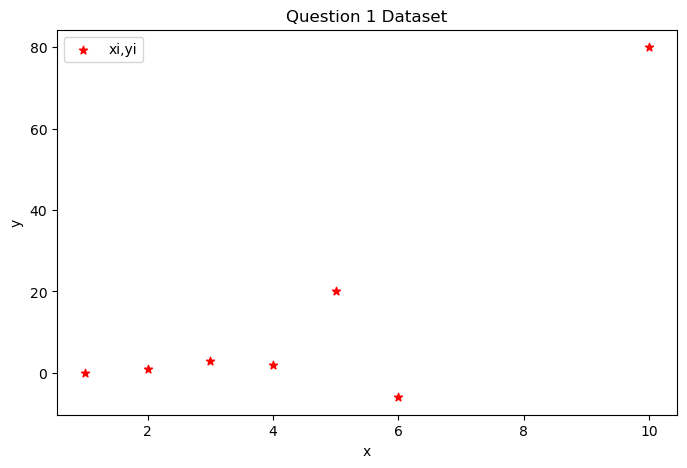

In [3]:
# Creating a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x,y, c='r', marker='*',label='xi,yi')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Question 1 Dataset')
plt.legend()

### 1.a)

In [4]:
x_mean = round(np.mean(x), 2)
y_mean = round(np.mean(y), 2)
print("x_mean:", x_mean, " | ", "y_mean:", y_mean)

x_mean: 4.43  |  y_mean: 14.29


### 1.b)
Sample x Variance = np.mean((x-x_mean)**2)\
Sample y Variance = np.mean((y-y_mean)**2)\
Sample Covariance = np.mean((x-x_mean)*(y-y_mean))

In [5]:
# Sample x Variance = np.mean((x-x_mean)**2)
x_variance = np.mean((x-x_mean)**2)

# Sample y Variance = np.mean((y-y_mean)**2)
y_variance = np.mean((y-y_mean)**2)

# Sample Covariance = np.mean((x-x_mean)*(y-y_mean))
sxy = np.mean((x-x_mean)*(y-y_mean))

print("Sample x Variance:", x_variance, " | ", "Sample y Variance:", y_variance, " | ", "Sample Covariance:", round(sxy, 2))

Sample x Variance: 7.673471428571427  |  Sample y Variance: 774.4898142857145  |  Sample Covariance: 62.88


### 1.c) What is the solution (a, b) in y = ax + b? (1-1)
a = slope\
b = intercept

In [6]:
# slope = Sample Covariance / Sample x Variance
a = sxy/x_variance

# intercept = y mean - (slope*x mean)
b = y_mean - a * x_mean

print("Slope:", a, " | ", "Intercept:", b)
print("")
print(f"y = {round(a,2)}x + {round(b, 2)}")

Slope: 8.194147554747993  |  Intercept: -22.010073667533604

y = 8.19x + -22.01


### 1.d)

### 1.e)  What is the solution (k) in y = kx? (1-2)
Assuming k = slope

In [7]:
# slope = Sample Covariance / Sample x Variance
k = sxy/x_variance

print("Slope:", a)
print("")
print(f"y = {round(a,2)}x")

Slope: 8.194147554747993

y = 8.19x


### 1.f)

### 1.g)

### 1.g) What is the solution (α, β, and γ) in y = αx + βx2 + γ? (1-3)
α = the coefficient of the linear term x 

β = the coefficient of the quadratic term x^2

γ = intercept term, which is the value of y when all x ariables are 0 \
\
θ=(X^TX)^−1X^Ty where X = [γ, α, β]

#### X

In [8]:
# Constructing the matrix X
X = array([[1, xi, xi**2] for xi in x])
print(X.shape)
X

(7, 3)


array([[  1,   1,   1],
       [  1,   2,   4],
       [  1,   3,   9],
       [  1,   4,  16],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,  10, 100]])

#### X^T

In [9]:
print(X.T.shape)
X.T

(3, 7)


array([[  1,   1,   1,   1,   1,   1,   1],
       [  1,   2,   3,   4,   5,   6,  10],
       [  1,   4,   9,  16,  25,  36, 100]])

#### (X^T * X)

In [10]:
XTX = X.T @ X
XTX

array([[    7,    31,   191],
       [   31,   191,  1441],
       [  191,  1441, 12275]])

#### (X^T * X)^-1

In [11]:
XTX_inv = inv(XTX)
XTX_inv

array([[ 1.51880057, -0.59662066,  0.04640647],
       [-0.59662066,  0.28016137, -0.02360554],
       [ 0.04640647, -0.02360554,  0.0021305 ]])

#### (X^T * y)

In [12]:
XTy = X.T @ y
XTy

array([ 100,  883, 8347])

#### θ = [γ, α, β]

In [13]:
theta = XTX_inv @ XTy
theta

array([12.41884817, -9.31500873,  1.58027923])

In [14]:
print("y = αx + βx2 + γ")
print(f"y = {round(theta[1],3)}x + {round(theta[2], 3)}x^2 + {round(theta[0], 3)}")

y = αx + βx2 + γ
y = -9.315x + 1.58x^2 + 12.419


### 1.h)

### 1.i)

#### Score Function

In [63]:
def score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    score = (((y_true - y_pred)**2).sum() /((y_true - y_true.mean()) ** 2).sum())
    
    print("The score for this solution is: ")
    return round(score,3)

# 1-1)

In [64]:
def predictor_1_1(X, y):
    
    # samples mean++
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Sample x Variance = np.mean((x-x_mean)**2)
    x_variance = np.mean((X-x_mean)**2)

    # Sample y Variance = np.mean((y-y_mean)**2)
    y_variance = np.mean((y-y_mean)**2)

    # Sample Covariance = np.mean((x-x_mean)*(y-y_mean))
    sxy = np.mean((X.T-x_mean)*(y-y_mean))
    
    # slope = Sample Covariance / Sample x Variance
    a = sxy/x_variance

    # intercept = y mean - (slope*x mean)
    b = y_mean - a * x_mean
    
    y_pred = (a * X) + b
    
    #solution
    print("Solution 1-1: ")
    print(f"y = {round(a,2)}x + {round(b, 2)}")
    print("")
    return y_pred[:,0]

In [66]:
y_pred_1_1 = predictor_1_1(X, Y)
score(Y, y_pred_1_1)

Solution 1-1: 
y = 8.19x + -22.0

The score for this solution is: 


0.335

In [67]:
import numpy as np
from sklearn import linear_model
X = np.array([1, 2, 3, 4, 5, 6, 10]).reshape(-1,1) 
Y = np.array([0, 1, 3, 2, 20, -6,80])
"""fit y=ax+b"""
model = linear_model.LinearRegression(fit_intercept=True) 
model.fit(X, Y)
print ("a = %s, b=%s, score=%s" % 
       ("{:.3f}".format(model.coef_[0]),
        "{:.3f}z".format(model.intercept_), 
        "{:.3f}".format(model.score(X, Y))))


a = 8.194, b=-22.003z, score=0.665


# (1-2)

In [68]:
def predictor_1_2(X, y):
    # Calculate the means of X and y
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Calculate the variance of X and the covariance between X and y
    x_variance = np.mean((X - x_mean)**2)
    sxy = np.mean((X.T - x_mean) * (y - y_mean))
    
    # Calculate the slope (k) as covariance divided by variance
    k = sxy / x_variance
    
    # Calculate predictions using vectorized operations
    y_pred = k * X  # This directly multiplies each element in X by k
    
    # Print the model formula
    print("Solution 1-2: ")
    print(f"y = {round(k,2)}x")
    print("")
    return y_pred[:, 0]


In [69]:
y_pred_1_2 = predictor_1_2(X, Y)
score(Y, y_pred_1_2)

Solution 1-2: 
y = 8.19x

The score for this solution is: 


0.96

In [70]:
import numpy as np
from sklearn import linear_model
X = np.array([1, 2, 3, 4, 5, 6, 10]).reshape(-1,1) 
Y = np.array([0, 1, 3, 2, 20, -6,80])
"""fit y=ax+b"""
model = linear_model.LinearRegression(fit_intercept=False) 
model.fit(X, Y)
print ("a = %s, b=%s, score=%s" % 
       ("{:.3f}".format(model.coef_[0]),
        "{:.3f}z".format(model.intercept_), 
        "{:.3f}".format(model.score(X, Y))))


a = 4.623, b=0.000z, score=0.489


# (1-3)

In [71]:
def predictor_1_3(X, y):

    X_design = np.hstack((X**0, X, X**2))
    

    XTX = np.dot(X_design.T, X_design)
    XTX_inv = inv(XTX)
    XTy = np.dot(X_design.T, y)
    theta = np.dot(XTX_inv, XTy)
    
    y_pred = np.dot(X_design, theta)
    

    print("Solution 1-3: ")
    print(f"y = {round(theta[1],3)}x + {round(theta[2], 3)}x^2 + {round(theta[0], 3)}")
    print("")
    return y_pred

In [72]:
y_pred_1_3 = predictor_1_3(X, Y)
score(Y, y_pred_1_3)

Solution 1-3: 
y = -9.315x + 1.58x^2 + 12.419

The score for this solution is: 


0.119

In [74]:
X = np.array([1, 2, 3, 4, 5, 6, 10]).reshape(-1,1)
Y = np.array([0, 1, 3, 2, 20, -6,80])


poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)


model = LinearRegression()
model.fit(X_poly, Y)


coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

a = coefficients[1]
b = coefficients[2] 

print ("a = %s, b=%s, intercept=%s, score=%s" % 
       ("{:.3f}".format(model.coef_[0]),
        "{:.3f}".format(model.coef_[1]),
        "{:.3f}z".format(model.intercept_), 
        "{:.3f}".format(model.score(X_poly, Y))))


a = 0.000, b=-9.315, intercept=12.419z, score=0.881


My solution for the functions 1-1, 1-2 and 1-3 has aligned with my previous answers for them.

### 1.j)

Mathematically, there is not an unique solution for the regression problem using the given function form and dataset. As explained in class, in order for a solution to be unique, the design matix X is of full rank. For X to be of full rankm the number of observation must be grater than or equal to the number of parameters. In our problem, the given function form is a 10th-degree polynomial plus b0 (11 pameters) and only 7 obeservations in the given dataset. This means we have more parameters than observations in the dataset, which implacates that X is not full of rank, and therefore, have multiple solutions. 

Now, if we fit numpy or sklearn, I am sure they have programming in place the deal with scenarios like this. Howerver, we should get an solution that overfits the data anf fail to generalize it. Let's fit a polynomial to our X and see its score:

In [23]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

In [31]:
# Fit a linear regression model
model = LinearRegression().fit(X_poly, Y)

# The model's coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 1.61885839e-08 -4.83585207e-02 -1.03889084e-01 -1.35071866e-01
 -8.05502926e-02  9.25042877e-02  1.94841847e-01 -1.63232771e-01
  4.55142965e-02 -5.34639689e-03  2.22423392e-04]
Intercept: 0.20336606071630037


In [32]:
model.score(X_poly, Y)

1.0

In [37]:
print ("a = %s, b=%s, score=%s" % 
       ("{:.3f}".format(model.coef_[0]),
        "{:.3f}z".format(model.intercept_), 
        "{:.3f}".format(model.score(X_poly, Y))))

a = 0.000, b=0.203z, score=1.000


In [40]:
def predictor_poly(X, Y): 
    poly = PolynomialFeatures(degree=10)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression().fit(X_poly, Y)
    
    return model

In [42]:
predictor_poly(X, Y).score(X_poly, Y)

1.0